<h1 align="center"><strong>Ecuación de calor</strong></h1>

<div align="justify">
    Se soluciona a través de una secuencia de problemas variacionales. La <i>ecuación diferencial parcial</i> (PDE) se aprecia en la Ecuación \ref{calor}.
    <br>
    <br>
    $$
    \begin{equation}
        \frac{\partial u}{\partial t} = \nabla ^2 u + f \, \, \, \, \text{en} \, \Omega \times (0,T] \\ \\
        u = u_D \,\,\,\ \text{sobre} \, \partial \Omega \times (0,T] \\
        u = u_0 \, \, \, \, \text{en} \, t=0
        \tag{1}
        \label{calor}
    \end{equation}
    $$
    <br>
    Dónde: $u$ es función del tiempo y del espacio $\left(u(x,y,t)\right)$. El término fuente $f$ y la condición de frontera $u_D$ puede variar también con el tiempo y el espacio. $u_0$ es una condición inicial función del espacio únicamente.
</div>

## __Formulación Variacional__

<div align="justify">
    Para el desarrollo de la formulación variacional, por tratarse de una simulación <i>espacio - temporal</i>, se realiza una discretización inicial del tiempo mediante el <i>método de diferencias finitas</i>; de modo que:
    <br>
    <br>
    $$
    \begin{equation}
        \left(\frac{\partial u}{\partial t} \right)^{n+1} = \nabla ^2 u^{n+1} + f^{n+1}
        \tag{2}
        \label{time-r}
    \end{equation}
    $$
    <br>
    El lado izquierdo de la Ecuación \ref{time-r} es equivalente a:
    <br>
    <br>
    $$
    \begin{equation}
        \left(\frac{\partial u}{\partial t} \right)^{n+1} \approx \frac{u^{n+1}-u^n}{\Delta t}
        \tag{3}
        \label{time-l}
    \end{equation}
    $$
    <br>
    Dónde $\Delta t$ correspone al tiempo discretizado. Combinando las Ecuaciones \ref{time-r} y \ref{time-l}, se tiene que:
    <br>
    <br>
    $$
    \begin{equation}
        \frac{u^{n+1}-u^n}{\Delta t} = \nabla ^2 u^{n+1} + f^{n+1}
        \tag{4}
        \label{time}
    \end{equation}
    $$
    <br>
    La Ecuación \ref{time} hace referencia a la Ecuación de calor (\ref{calor}) discretizada en el tiempo (conocida también como la <i>regresión de Euler</i>).
    <br>
    <br>
    El siguiente paso consiste en reordenar la Ecuación \ref{time} para separar los términos desconocidos $\left(u^{n+1}\right)$ de los conocidos $\left(u^n \right)$. La condición inicial se puede apreciar en la Ecuación \ref{inicial}.
    <br>
    <br>
    $$
    \begin{equation}
        u^0 = u_0
        \tag{5}
        \label{inicial}
    \end{equation}
    $$
    <br>
    $$
    \begin{equation}
        u^{n+1} - \Delta t \nabla ^2 u^{n+1} = u^n + \Delta t f ^{n+1} \, , \, \, n \in N
        \tag{6}
        \label{unkown}
    \end{equation}
    $$
    <br>
    Transformando la Ecuación \ref{unkown} en la forma débil $\left[a(u,v) = L_{n+1} (v) \right]$, se tiene:
    <br>
    <br>
    $$
    \begin{equation}
        a(u,v) = \int _{\Omega} \left(u v + \Delta t \nabla u \cdot \nabla v \right) \, dx \\
        L_{n+1} (v) = \int _{\Omega} \left(u^n + \Delta t f ^{n+1} \right) v \, dx
        \tag{7}
        \label{a}
    \end{equation}
    $$
    <br>
    Adicional, la condición inicial (Ecuación \ref{inicial}) también debe tener un planteamiento variacional $\left[a_0(u,v) = L_{0} (v) \right]$, de modo que:
    <br>
    <br>
    $$
    \begin{equation}
        a_0(u,v) = \int _{\Omega} u v \, dx \\
        L_{0} (v) = \int _{\Omega} u_0 v \, dx
        \tag{8}
        \label{aa}
    \end{equation}
    $$
    <br>
    Al resolver el problema variacional descrito, $u^0$ se convierte en una proyección $L^2$ de la condición inicial $u_0$ dentro del espacio finitesimal. De manera alternativa a la Ecuación \ref{aa}, se puede realizar la construcción de $u^0$ mediante la interpolación de la condición inicial $u_0$; de modo que: 
    <br>
    <br>
    $$
    \begin{equation}
        u^0 = \sum _{j=1} ^N U_j ^0 \phi _j
        \tag{9}
        \label{u}
    \end{equation}
    $$
    <br>
    Las Ecuaciones \ref{aa} y \ref{u} se refieren a las estrategias computacionales para calcular la condición inicial, ya sea por <i>proyección</i> o <i>interpolación</i>. 
</div>

## __Implementación en FEniCS__

<div align="justify">
    La implementación del tiempo se debe realizar manualmente. Se desarrollarán dos pruebas.
</div>

### 1. Solución analítica

<div align="justify">
    Como las ecuaciones planteadas son exactas para <i>funciones lineales</i>, se plantea una plantea una combinación entre una función con variación lineal en el tiempo y otra con variación cuadrática espacial.
    <br>
    <br>
    $$
    \begin{equation}
        u = 1+x^2+\alpha y^2 + \beta t
        \tag{10}
        \label{sa}
    \end{equation}
    $$
    <br>
    La Ecuación \ref{sa} mantiene una función cuyos valores computados en los nodos será exacto siempre y cuando el tamaño de los elementos y de $\Delta t$ sean divididos de manera uniforme. Al relacionar las Ecuaciones \ref{sa} y \ref{calor}, se obtiene que:
    <br>
    <br>
    $$
    \begin{equation}
        f(x,y,t) = \beta -2 -2\alpha \\
        u_D(x,y,t) = 1+x^2+\alpha y^2 + \beta t \\
        u_0(x,y) = 1+x^2 +\alpha y^2
        \tag{11}
        \label{f}
    \end{equation}
    $$
    <br>
</div>

Tiempo:  0.2
Error:  2.6645352591003757e-15
Tiempo:  0.4
Error:  2.6645352591003757e-15
Tiempo:  0.6
Error:  3.1086244689504383e-15
Tiempo:  0.8
Error:  3.552713678800501e-15
Tiempo:  1.0
Error:  3.552713678800501e-15
Tiempo:  1.2
Error:  3.9968028886505635e-15
Tiempo:  1.4
Error:  4.440892098500626e-15
Tiempo:  1.6
Error:  3.552713678800501e-15
Tiempo:  1.8
Error:  4.440892098500626e-15
Tiempo:  2.0
Error:  4.440892098500626e-15


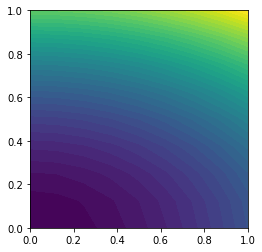

In [42]:
%matplotlib inline
from fenics import *
import numpy as np

#Datos generales y temporales
T = 2.0              #Tiempo final
num_steps = 10
dt = T/num_steps
alpha = 3
beta = 1.2

#Malla y función espacial
nx = ny = 8
mesh = UnitSquareMesh(nx,ny)
V = FunctionSpace(mesh, 'P', 1)

#Condición de frontera
u_D = Expression("1+x[0]*x[0] + alpha*x[1]*x[1] + beta*t",
                degree=2, alpha=alpha, beta=beta, t=0)
def boundary(x,on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

#Condición inicial: Puede ser por interpolación o proyección
u_n = interpolate(u_D, V)
#u_n = project(u_D, V)

#Problema Variacional
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta-2-2*alpha)

a = (u*v + dot(dt*grad(u), grad(v)))*dx
L = (u_n + dt*f)*v*dx

#Proceso iterativo temporal
u = Function(V)
t = 0
uu = []
for n in range(num_steps):
    t = round(t + dt,2)
    u_D.t = t
    
    #Computar solución
    solve(a == L, u, bc)
    
    #Graficar solución
    uu.append(u)
    plot(u)
    
    #Computar errores en los vértices
    u_e = interpolate(u_D, V)
    error = np.abs(u_e.vector() - u.vector()).max()
    print("Tiempo: ", t)
    print("Error: ", error)
    
    #Actualizar solución anterior
    u_n.assign(u)
#Graficar malla
#plot(mesh)

### 2. Difusión de una función Gaussiana

<div align="justify">
    El valor inicial es el siguiente:
    <br>
    <br>
    $$
    \begin{equation}
        u_0 (x,y) = e^{-\alpha x^2 - \alpha y^2}
        \tag{12}
        \label{uo}
    \end{equation}
    $$
    <br>
    Donde: $\alpha = 5$ y $\Omega = [-2,-2] \times [2,2]$. Se usará condición de frontera homogenea tipo Dirichlet $(u_D=0)$.
</div>

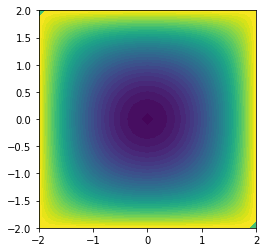

In [50]:
%matplotlib inline
from fenics import *
import numpy as np

#Datos generales y temporales
T = 2.0              #Tiempo final
num_steps = 50
dt = T/num_steps
alpha = 5

#Malla y función espacial
nx = ny = 30
mesh = RectangleMesh(Point(-2,-2), Point(2,2), nx,ny)
V = FunctionSpace(mesh, 'P', 1)

#Condición de frontera
u_D = Constant(0)
def boundary(x,on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

#Condición inicial: Puede ser por interpolación o proyección
u_0 = Expression("exp(-alpha*pow(x[0],2) - alpha*pow(x[1],2))",
                degree=2, alpha=alpha)
u_n = interpolate(u_0, V)
#u_n = project(u_0, V)

#Problema Variacional
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(beta-2-2*alpha)

a = (u*v + dot(dt*grad(u), grad(v)))*dx
L = (u_n + dt*f)*v*dx

F = u*v*dx + dt*dot(grad(u), grad(v))*dx - (u_n + dt*f)*v*dx
a, L = lhs(F), rhs(F)

# Create VTK file for saving solution
vtkfile = File('heat_gaussian/solution.pvd')

#Proceso iterativo temporal
u = Function(V)
t = 0
uu = []
for n in range(num_steps):
    t = round(t + dt,2)
    u_D.t = t
    
    #Computar solución
    solve(a == L, u, bc)
    
    #Graficar solución
    vtkfile << (u, t)
    #uu.append(u)
    plot(u)
    
    #Computar errores en los vértices
    """
    u_e = interpolate(u_0, V)
    error = np.abs(u_e.vector() - u.vector()).max()
    print("Tiempo: ", t)
    print("Error: ", error)
    """

    
    #Actualizar solución anterior
    u_n.assign(u)
#Graficar malla
#plot(mesh)